In [31]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d

import time
import matplotlib.dates as md



%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import networkx as nx
import datetime

In [32]:
df_place_details = pd.read_csv("./data/place_details.csv")

In [33]:
df_edges = pd.read_csv('data/graph_edges_with_directionality.csv')

In [34]:
G = nx.DiGraph()

In [35]:
for orig,desti in zip(df_edges['origin_place_id'], df_edges['destination_place_id']):
    G.add_edge(orig, desti)

In [36]:
id1 = list(G.nodes())[0]

In [37]:
df_id1 = pd.read_csv("./data/by_place_5min/" + id1 + ".csv")
speed1 = np.array(df_id1['speed_mean'])

In [38]:
night = True
day = 0
i_day = 0
is_2015 = False

days_array = [[]]

date_time = []

for i,(start,end, speed) in enumerate(zip(df_id1['start_interval_s'], df_id1['end_interval_s'],df_id1['speed_mean'])):
    time = datetime.datetime.strptime(start,\
                '%Y-%m-%d %H:%M:%S')
    if not is_2015 and time.year != 2015:
        pass
    else:
        is_2015 = True
        if 1 < time.hour and time.hour < 24:
            night = False
            i_day = i_day + 1
            days_array[day].append(speed)
        elif not night:
            night = True
            day = day + 1
            i_day = 0
            days_array.append([])

In [39]:
start = datetime.datetime
for i,t in enumerate(df_id1['start_interval_s']):
    time = datetime.datetime.strptime(t,\
                '%Y-%m-%d %H:%M:%S')
    if time.hour == 0:
        print(i)
        print(time)
        break

0
2013-01-01 00:00:00


In [66]:
night = True

days_flow_array = [[]]
days_array = [[]]

date_time = []

for i,(start,end, flow, speed) in enumerate(zip(df_id1['start_interval_s'], df_id1['end_interval_s'],df_id1['flow_bucket'],df_id1['speed_mean'])):
    time = datetime.datetime.strptime(start,\
                '%Y-%m-%d %H:%M:%S')
    date_time.append(time)
    if time.year != 2015 and time.weekday() < 5:
 # for weeken
   # if time.year != 2015 and time.weekday() > 4:

        pass
    else:
        if 1 < time.hour and time.hour < 24:
            night = False
            days_flow_array[-1].append(flow)
            days_array[-1].append(speed)
        elif not night:
            night = True
            days_flow_array.append([])
            days_array.append([])

In [67]:
length = len(sorted(days_flow_array,key=len, reverse=True)[0])
y_flow=np.array([xi+[None]*(length-len(xi)) for xi in days_flow_array], dtype = np.float)

length = len(sorted(days_array,key=len, reverse=True)[0])
y = np.array([xi+[None]*(length-len(xi)) for xi in days_array], dtype = np.float)

In [68]:
y_mean = [np.nanmean(day) for day in days_array]
y_flow_mean = [np.nanmean(day) for day in days_flow_array]

In [69]:
time = datetime.datetime.strptime("2013-01-01 01:00:00",'%Y-%m-%d %H:%M:%S')

In [70]:
times = []
for i in range(23*12):
    times.append(time + datetime.timedelta(minutes = i*5))

In [71]:
hours = [t.hour for t in times]

In [72]:
times = times[:len(np.nanmean(y_flow, axis = 0))]
dates = times

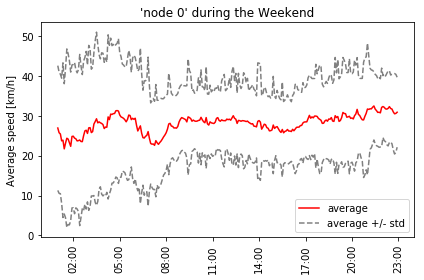

In [73]:
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.1)
plt.xticks( rotation=90 )
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,np.nanmean(y, axis = 0), color = 'red', label = 'average')
plt.plot(dates, np.nanmean(y, axis = 0) + np.nanstd(y, axis = 0), color = 'grey', linestyle = '--', label = 'average +/- std')
plt.plot(dates, np.nanmean(y, axis = 0) - np.nanstd(y, axis = 0), color = 'grey', linestyle = '--')
plt.ylabel("Average speed [km/h]")
plt.legend(loc = 'lower right')
plt.title("'node 0' during the Weekend")

plt.tight_layout()
plt.savefig("average_speed_week.png", dpi = 400)
plt.show()